# Week 1 demo

### PhysioNet
A database store physiologic signal.

### WFDB
A series of tools to process the physiologic signal data. 789 stars

### PhysioNet and WFDB work together as an Ecosystem
Many of the PhysioNet datasets meet the WFDB Format Specification which has preprocessed with WFDB's label and header standard.
The supported datasets can download, analyze, and plot using WFDB directly.

Plot the drivedb case 1 by download archive file from https://physionet.org/content/drivedb/ 

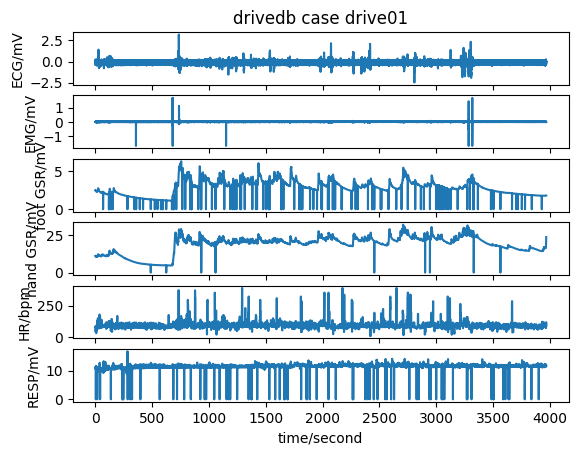

In [ ]:
import wfdb

# read drive01 record from drivedb
record_drive01 = wfdb.rdrecord('stress-recognition-in-automobile-drivers-1.0.0/drive01') 

# Plot the signal
wfdb.plot_wfdb(record=record_drive01, title='drivedb case drive01')

Wearable Device Dataset from Induced Stress and Structured Exercise Sessions stores data using csv and does not follow the standrad of WFDB. 
To plot the data set as WFDB, we need to first convert the dataset to WFDB Specification, then read the WFDB's data files.
We can use the demo file Wearable_Dataset.ipynb to get the dataset structures.

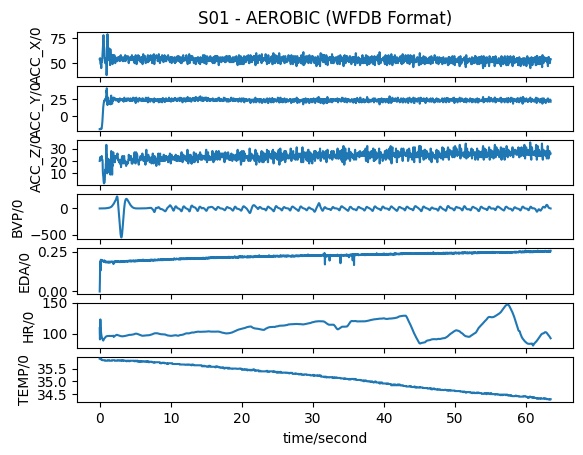

In [8]:
import os
import numpy as np
import pandas as pd
import wfdb

# === CONFIG for AEROBIC S01 ===
subject_folder = '/Users/wasdwasd0105/wfdb/ds/wearable-device-dataset-from-induced-stress-and-structured-exercise-sessions/Wearable_Dataset/AEROBIC/S01'
record_name = 'wfdb_S01'
output_basename = os.path.join(subject_folder, record_name)

# === LOAD SIGNALS from csv===
signals = {}
timestamps = None
fs = None

for signal_name in ['ACC', 'BVP', 'EDA', 'HR', 'TEMP']:
    csv_path = os.path.join(subject_folder, f'{signal_name}.csv')
    df = pd.read_csv(csv_path, header=None)

    if timestamps is None:
        utc_start = df.iloc[0, 0]  # 0 the of csv is Timestamp

    if fs is None:
        fs = int(float(df.iloc[1, 0]))  # 1 the of csv is fs

    df_values = df.iloc[2:, :].astype(float)  # Actual signal values

    if signal_name == 'ACC':
        signals['ACC_X'] = df_values.iloc[:, 0].values
        signals['ACC_Y'] = df_values.iloc[:, 1].values
        signals['ACC_Z'] = df_values.iloc[:, 2].values
    else:
        signals[signal_name] = df_values.iloc[:, 0].values

# === ALIGN & WRITE WFDB RECORD ===
# save data to WFDB Format(dat and hea)

min_len = min(len(sig) for sig in signals.values())
signal_matrix = np.column_stack([signals[k][:min_len] for k in signals]).astype(np.float64)

wfdb.wrsamp(
    record_name=record_name,
    write_dir=subject_folder,
    fs=fs,
    units=['0'] * signal_matrix.shape[1],
    sig_name=list(signals.keys()),
    p_signal=signal_matrix
)

# === PLOT from WFDB file ===
record = wfdb.rdrecord(output_basename)
wfdb.plot_wfdb(record=record, title='S01 - AEROBIC (WFDB Format)')

The Wearable Exam Stress Dataset uses the similar data structure with the Wearable Device Dataset.

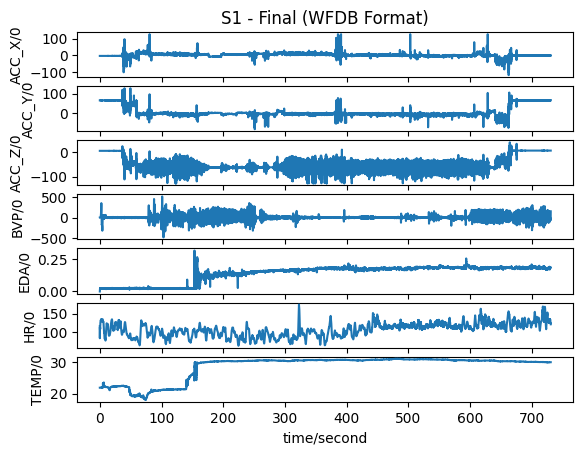

In [ ]:
import os
import numpy as np
import pandas as pd
import wfdb

# === CONFIG for Final S1 ===
subject_folder = '/Users/wasdwasd0105/wfdb/ds/a-wearable-exam-stress-dataset-for-predicting-cognitive-performance-in-real-world-settings/Data/S1/Final'
record_name = 'wfdb_S1_Final'
output_basename = os.path.join(subject_folder, record_name)

# === LOAD SIGNALS from csv===
signals = {}
timestamps = None
fs = None

for signal_name in ['ACC', 'BVP', 'EDA', 'HR', 'TEMP']:
    csv_path = os.path.join(subject_folder, f'{signal_name}.csv')
    df = pd.read_csv(csv_path, header=None)

    if timestamps is None:
        utc_start = df.iloc[0, 0]  # 0 the of csv is Timestamp

    if fs is None:
        fs = int(float(df.iloc[1, 0]))  # 1 the of csv is fs

    df_values = df.iloc[2:, :].astype(float)  # Actual signal values

    if signal_name == 'ACC':
        signals['ACC_X'] = df_values.iloc[:, 0].values
        signals['ACC_Y'] = df_values.iloc[:, 1].values
        signals['ACC_Z'] = df_values.iloc[:, 2].values
    else:
        signals[signal_name] = df_values.iloc[:, 0].values

# === ALIGN & WRITE WFDB RECORD ===
# save data to WFDB Format(dat and hea)

min_len = min(len(sig) for sig in signals.values())
signal_matrix = np.column_stack([signals[k][:min_len] for k in signals]).astype(np.float64)

wfdb.wrsamp(
    record_name=record_name,
    write_dir=subject_folder,
    fs=fs,
    units=['0'] * signal_matrix.shape[1],
    sig_name=list(signals.keys()),
    p_signal=signal_matrix
)

# === PLOT from WFDB file ===
record = wfdb.rdrecord(output_basename)
wfdb.plot_wfdb(record=record, title='S1 - Final (WFDB Format)')

### Rapids and Beiwe
Beiwe: https://github.com/onnela-lab 60-70 stars

Rapids: https://www.rapids.science/ 30-40 stars

Both platforms are designed to collect sensor data from smartphones. They include mobile applications that can be installed on the device and server components that record the collected data. 

They primary focus on data collection rather than processing or visualization.

Beiwe is a more comprehensive smartphone sensing platform. It offers fully functional iOS and Android apps that can be downloaded directly from the app stores. It also provides options for using a maintained cloud server or setting up a self-hosted backend.

Rapids is a simpler project that requires manual configuration of both the server and the mobile application. However, it supports integration with wearable devices such as Fitbit